In [3]:
#import sklearn as sk;
import pandas as pd;
import numpy as np; 


Label: Human_Development_Index

Countrys: 
"Name" 
"Region" 

Education: 

Event:

Heath:

Month:

Population:

Quality of Life:

144
144
144
144
Test Data shape: 
   CountryKey  SurrogateKey             Name                     Region  \
0           1            20       Bangladesh                 South Asia   
1           2            35           Canada              North America   
2           3            43  Dem. Rep. Congo         Sub-Saharan Africa   
3           4           130          Liberia         Sub-Saharan Africa   
4           5           153           Mexico  Latin America & Caribbean   
5           6           166        Mauritius         Sub-Saharan Africa   
6           7           177            Nepal                 South Asia   
7           8           250    United States              North America   
8           9           256          Vietnam        East Asia & Pacific   

       Continent          Currency        Capital WB-2_Code Country_Code  \
0           Asia  Bangladeshi taka          Dhaka        BD          BGD   
1  North America   Canadian dollar         Ottawa        CA    

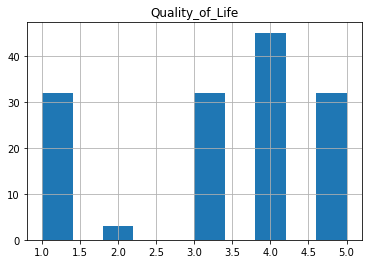

In [4]:
# load the datasets 
dfCountry = pd.read_csv('./Tables/Country.csv')
dfEducation = pd.read_csv('./Tables/Education.csv')
dfEvent = pd.read_csv('./Tables/Event.csv')
dfFactTable = pd.read_csv('./Tables/Fact_Table.csv')
dfHealth = pd.read_csv('./Tables/Health.csv')
dfMonth = pd.read_csv('./Tables/Month.csv')
dfPopulation = pd.read_csv('./Tables/Population.csv')
dfQualityOfLife = pd.read_csv('./Tables/Quality_of_Life.csv')

dfPopulation = dfPopulation.drop(["PopulationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfEducation = dfEducation.drop(["EducationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfHealth = dfHealth.drop(["HealthKey", "SurrogateKey", "Country", "Year"], axis=1)
dfQualityOfLife = dfQualityOfLife.drop(["QualityofLifeKey", "SurrogateKey"], axis=1)

print(dfEducation.shape[0])
print(dfHealth.shape[0])
print(dfPopulation.shape[0])
print(dfQualityOfLife.shape[0])

canada = dfFactTable.loc[dfFactTable['CountryKey'] == 2]
unitedStates = dfFactTable.loc[dfFactTable['CountryKey'] == 8]
mexico = dfFactTable.loc[dfFactTable['CountryKey'] == 5]
mauritius = dfFactTable.loc[dfFactTable['CountryKey'] == 6]
liberia = dfFactTable.loc[dfFactTable['CountryKey'] == 4]
congo = dfFactTable.loc[dfFactTable['CountryKey'] == 3]
vietnam = dfFactTable.loc[dfFactTable['CountryKey'] == 9]
nepal = dfFactTable.loc[dfFactTable['CountryKey'] == 7]
bangladesh = dfFactTable.loc[dfFactTable['CountryKey'] == 1]

fixedFact = canada.append(unitedStates)
fixedFact = fixedFact.append(mexico)
fixedFact = fixedFact.append(mauritius)
fixedFact = fixedFact.append(liberia)
fixedFact = fixedFact.append(congo)
fixedFact = fixedFact.append(vietnam)
fixedFact = fixedFact.append(nepal)
fixedFact = fixedFact.append(bangladesh)
fixedFact = fixedFact.drop(["MonthKey","CountryKey", "EducationKey",  "QualityofLifeKey", "HealthKey", "EventKey", "PopulationKey", "Development_Index"], axis=1) 

df = pd.concat([dfQualityOfLife, dfHealth, dfPopulation, dfEducation, fixedFact], axis=1)

# print the shape of the dataframes 
print(f"Test Data shape: \n{dfCountry}\n")
print(f"Test Data shape: \n{dfEducation.shape}\n")
print(f"Test Data shape: \n{dfEvent.shape}\n")
print(f"Test Data shape: \n{dfFactTable.shape}\n")
print(f"Test Data shape: \n{dfHealth.shape}\n")
print(f"Test Data shape: \n{dfMonth.shape}\n")
print(f"Test Data shape: \n{dfPopulation.shape}\n")
print(f"Test Data shape: \n{dfQualityOfLife.shape}\n")
print("_____________________________________________\n")


#for item in (df.columns.values):
    # scatterPlot = df.plot.scatter(x=item, y='Quality_of_Life', c='orange')
    # scatterPlot.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
    # scatterPlot.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
    # scatterPlot.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    # scatterPlot.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black
    # scatterPlot.spines['left'].set_color('white')        # setting up Y-axis tick color to red
    # scatterPlot.spines['top'].set_color('white')         #setting up above X-axis tick color to red
    #scatterPlot


#print(f"Health Scatterplot: \n{scatterHealth}\n")
dick = df.hist(column='Quality_of_Life')



In [5]:
fixedFact


,Quality_of_Life,Human_Development_Index
16,1,0.894
17,1,0.898
18,1,0.896
19,1,0.898
20,1,0.898
...,...,...
11,4,0.606
12,4,0.616
13,4,0.625
14,4,0.632


In [6]:
df

,Country,Year,People_practicing_open_defecation(%_of_population),%_of_population_using_least_basic_sanitation_services,%_of_population_using_safely_managed_sanitation_services,%_of_population_using_at_least_basic_drinking_water_services,%_of_population_using_safely_managed_drinking_water_services,%_of_population_with_basic_handwashing_facilities_with_soap,"Labor_force,_female(%_of_total_labor_force)",%_of_women_employed_in_the_nonagricultural_sector,...,Public_spending_on_education_total(%_of _GDP),School_enrollment_primary_male(%gross),School_enrollment_primary_female(%gross),School_enrollment_secondary_male(%gross),School_enrollment_secondary_female(%gross),School_enrollment_tertiary_female(%gross),School_enrollment_tertiary(%gross),Primary_completion_rate_total(%_of_relevant_age_group),Quality_of_Life,Human_Development_Index
0,Canada,2005-01-01,0.000000,99.805190,78.885765,99.234640,98.240800,NaN,46.419240,49.1,...,4.76588,97.77119,96.93871,102.48706,100.23438,NaN,NaN,NaN,4,0.514
1,Canada,2006-01-01,0.000000,99.750336,79.280685,99.234620,98.299470,NaN,46.674060,49.2,...,NaN,99.23444,98.50983,102.73236,100.66950,NaN,NaN,NaN,4,0.521
2,Canada,2007-01-01,0.000000,99.695950,79.675170,99.235500,98.359970,NaN,46.855960,49.6,...,4.76641,99.20019,98.72111,103.00190,100.74837,73.95901,63.60006,NaN,4,0.528
3,Canada,2008-01-01,0.000000,99.641460,80.068950,99.236080,98.419910,NaN,46.800793,49.7,...,4.62612,98.10118,97.92086,103.52593,101.10425,74.44554,63.76740,NaN,4,0.531
4,Canada,2009-01-01,0.000000,99.586845,80.462020,99.236360,98.479260,NaN,47.032047,50.4,...,4.84058,98.93639,99.08513,103.90808,101.50361,73.92633,63.06577,NaN,4,0.543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Bangladesh,2016-01-01,1.851918,48.225540,34.671750,97.229614,56.733536,45.139103,28.748392,NaN,...,1.53554,NaN,NaN,67.97476,75.01081,14.68115,17.87436,NaN,4,0.693
140,Bangladesh,2017-01-01,1.020961,49.728413,35.685566,97.353260,57.154076,48.496960,30.174154,NaN,...,NaN,111.08681,119.05796,64.34774,75.21749,14.91033,18.15146,NaN,4,0.696
141,Bangladesh,2018-01-01,0.220963,51.219707,36.690105,97.472530,57.590656,51.827020,30.364622,NaN,...,NaN,112.35745,120.75175,67.35348,78.27073,16.98329,20.56507,NaN,3,0.700
142,Bangladesh,2019-01-01,0.000000,52.698704,37.684883,97.587425,58.043262,55.129330,30.514652,NaN,...,1.32632,NaN,NaN,67.09110,78.27727,20.01847,24.01689,NaN,3,0.704
